In [1]:

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [2]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from matplotlib.colors import Normalize

## Import modules from parent and multimode expts

In [3]:
import json
import os

# Get the current working directory
path = os.getcwd()
print("Current Path:", path)

# Isolate the parent directory
parent_path = os.path.dirname(path)
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: c:\_Lib\python\multimode_expts\analysis_notebooks
Parent Path: c:\_Lib\python\multimode_expts


In [4]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\s

In [5]:
from multimode_expts.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [6]:
import experiments.fitting as fitter
from numpy.linalg import inv

# Exp path

In [7]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs

data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data1'
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\240911\data1


# Qubit Temperature

## EF rabi with ge pulse 

[211.03340568   4.31659208 -76.44202695  44.94111456 -12.91291385
  -0.98208085]
Decay from avgi [us] 44.941114558362386
Rate [MHz] 4.316592080060688
Pi length from avgi data [us]: 0.10710740212927285
	Pi/2 length from avgi data [us]: 0.049191343497092525
Fit params:  [211.03340568   4.31659208 -76.44202695  44.94111456 -12.91291385
  -0.98208085]

Decay from avgq [us] 16.289126703669247
Rate [MHz] 4.313965474509611
Pi length from avgq data [us]: 0.10691107661658533
Pi/2 length from avgq data [us]: 0.053455538308292666
Fit params:  [174.31679075   4.31396547 -76.03584961  16.2891267  -87.82143322
  -0.98047516]


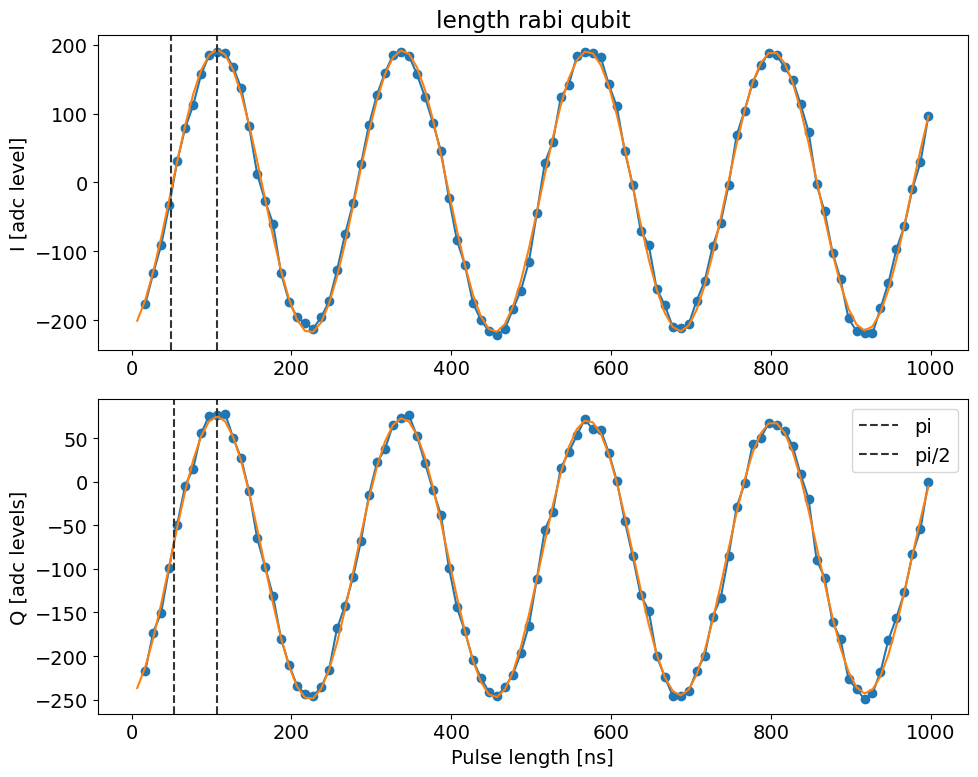

In [136]:
temp_data, attrs = prev_data(expt_path, '00000_LengthRabiGeneralExperiment.h5')
p, pCov, xlist1, Ilist1 = length_rabi_display(temp_data, fit=True, fitparams=[300, None, None, None, None, None], title='length rabi qubit', 
                    vlines = [], active_reset=False, return_fit_params=True)

## EF rabi without ge pulse 

Attempted to init fitparam 4 to 179.41990322510824, which is out of bounds -274.69160584415584 to -269.8045448051948. Instead init to -272.2480753246753
[150.           4.13192675 -51.34501268   0.22676155 179.30976603
  -0.71802455]
Decay from avgi [us] 0.22676154711452276
Rate [MHz] 4.131926750263083
Pi length from avgi data [us]: 0.09502226417687969
	Pi/2 length from avgi data [us]: 0.0345178033986042
Fit params:  [150.           4.13192675 -51.34501268   0.22676155 179.30976603
  -0.71802455]

Decay from avgq [us] 0.21750000000000005
Rate [MHz] 4.13261788456034
Pi length from avgq data [us]: 0.09414043672020009
Pi/2 length from avgq data [us]: 0.047070218360100044
Fit params:  [ 1.50000000e+02  4.13261788e+00 -5.00567229e+01  2.17500000e-01
 -2.72337085e+02 -7.18024554e-01]


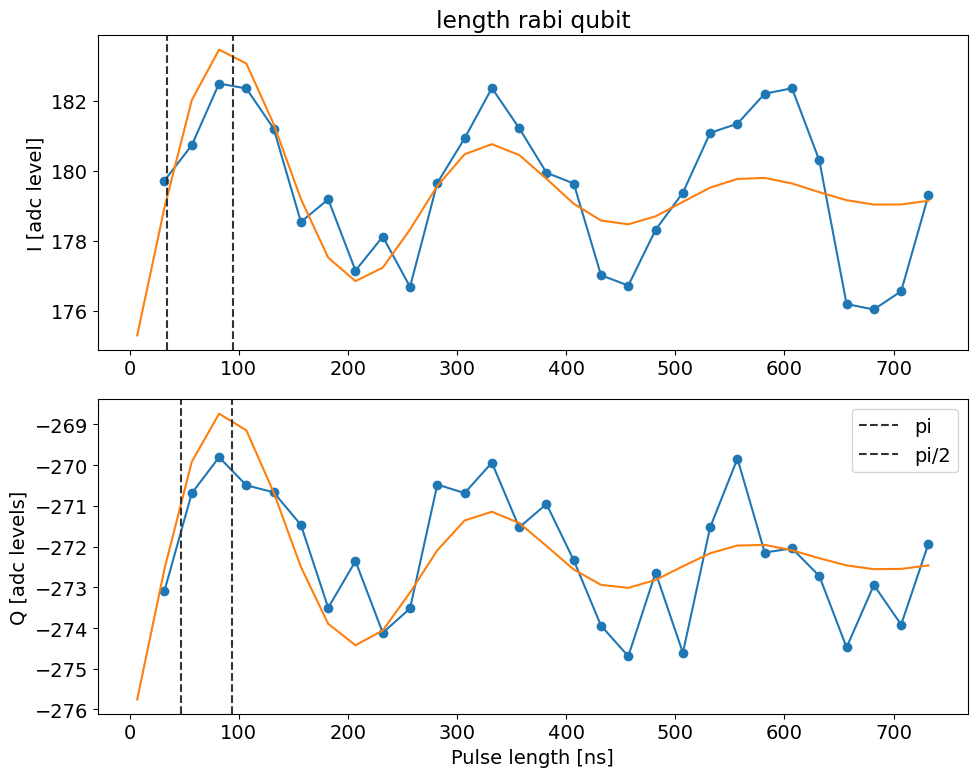

In [137]:
temp_data, attrs = prev_data(expt_path, '00003_LengthRabiGeneralExperiment.h5')
p, pCov, xlist2, Ilist2 = length_rabi_display(temp_data, fit=True, fitparams=[300, None, None, None, None, None], title='length rabi qubit', 
                    vlines = [], active_reset=False, return_fit_params=True)

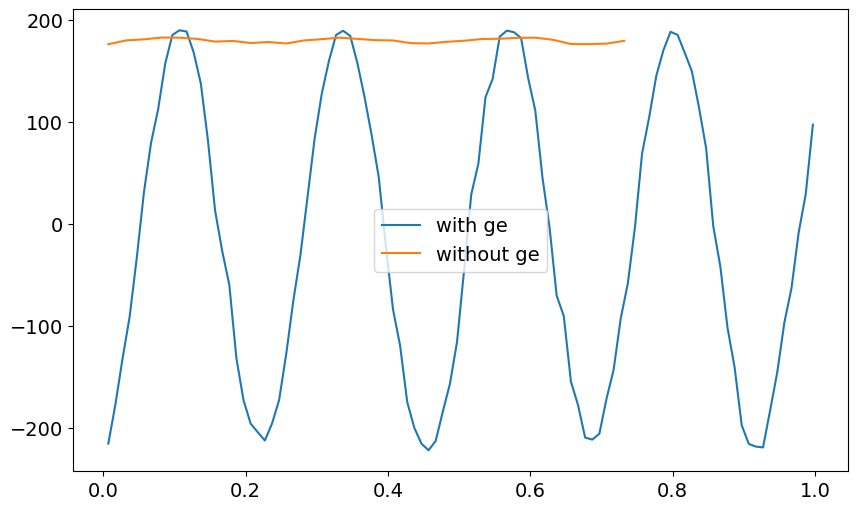

In [141]:
plt.plot(xlist1, Ilist1, label = 'with ge')
plt.plot(xlist2, Ilist2, label = 'without ge')
plt.legend()

In [129]:
amp_with_ge = max(Ilist1) - min(Ilist1)
amp_without_ge = max(Ilist2) - min(Ilist2)
print('With GE:', amp_with_ge)
print('Without GE:', amp_without_ge)

With GE: 411.7973506493506
Without GE: 6.5449110389610325


In [142]:
n_th = amp_without_ge / amp_with_ge
freq = attrs['config']['device']['qubit']['f_ge'][0] *1e-3 # in Ghz
freq_to_mK = 48 # 1Ghz = 48mK
freq_temp = freq * freq_to_mK
temp_th = freq_temp / np.log((n_th + 1)/n_th)
print('temp_th (mK)', temp_th)
print('n_th (%)', n_th * 100)

temp_th (mK) 41.19462627254442
n_th (%) 1.5893523910827896


## Ef ramsey

Current pi pulse frequency: 3425.5564066067
Fit frequency from I [MHz]: 0.20180791678768745 +/- 0.0002968599514706458
Suggested new pi pulse frequency from fit I [MHz]:
 	3425.5545986899124
 	3425.9582145234876
T2 Ramsey from fit I [us]: 49.60589118278579
Fit frequency from Q [MHz]: 0.2020343228802794 +/- 0.00033918896599770645
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3425.5543722838197
 	3425.9584409295803
T2 Ramsey from fit Q [us]: 47.41265342245432


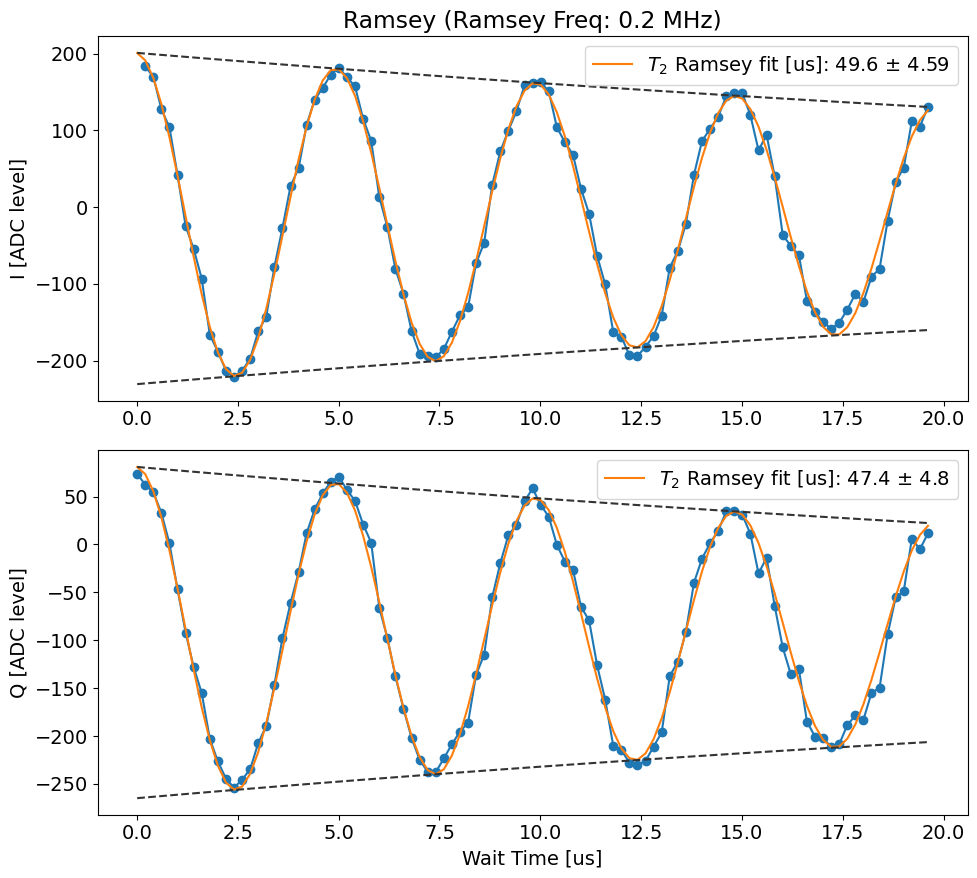

In [98]:
temp_data, attrs = prev_data(expt_path, '00021_RamseyExperiment.h5')

p, pCov, xdata_, idata = Ramsey_display(temp_data,  attrs, normalize = [False, 'g_data', 'e_data'], active_reset=False, threshold = -25.73026268397916, readouts_per_rep=4,
                ramsey_freq=attrs['config']['expt']['ramsey_freq'], initial_freq=attrs['config']['device']['qubit']['f_ef_idle'][0], fit=True,fitparams=None, #[1000, 0.2, None, None, None, None],
                  return_all_param=True,  title='Ramsey')

## EF ramsey without initial ge pulse

Current pi pulse frequency: 3425.5564066067
Fit frequency from I [MHz]: 0.1985335420519609 +/- 0.004547027163001125
Suggested new pi pulse frequency from fit I [MHz]:
 	3425.557873064648
 	3425.954940148752
T2 Ramsey from fit I [us]: 28.1707134635878
Fit frequency from Q [MHz]: 0.19625186915555512 +/- 0.004870018051468021
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3425.5601547375445
 	3425.9526584758555
T2 Ramsey from fit Q [us]: 22.434045914430868


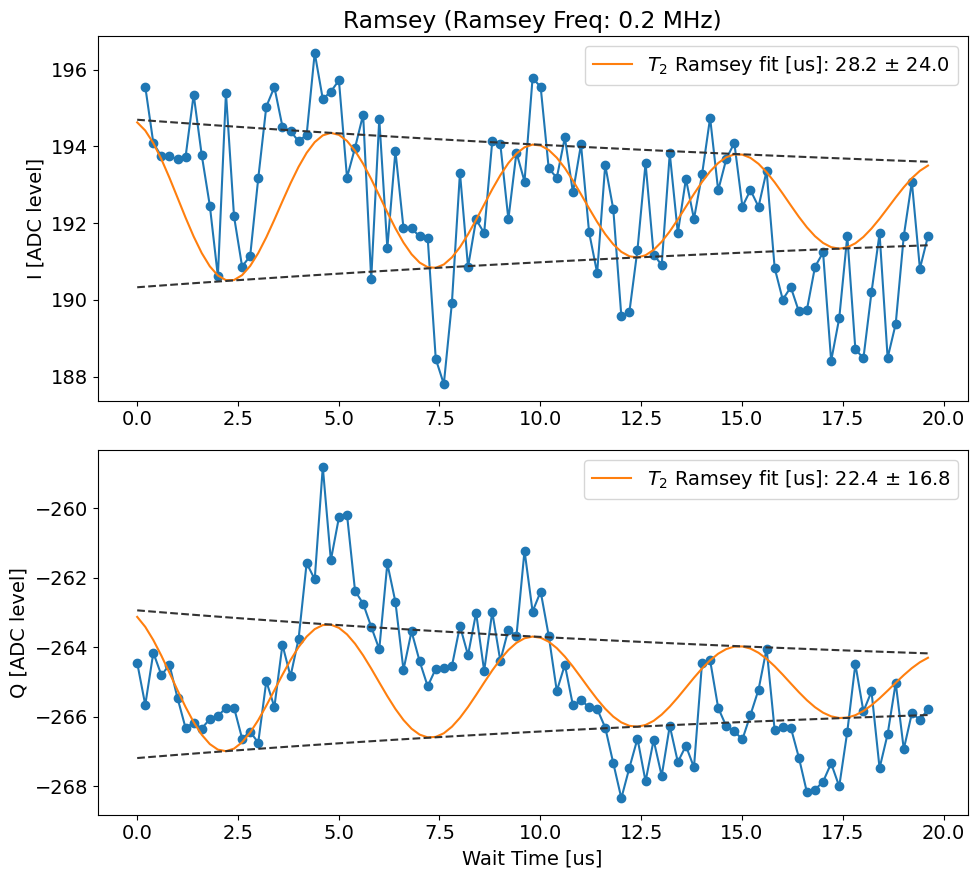

In [99]:
temp_data, attrs = prev_data(expt_path, '00023_RamseyExperiment.h5')

p_p, pCov_p, xdata_p, idata_p = Ramsey_display(temp_data,  attrs, normalize = [False, 'g_data', 'e_data'], active_reset=False, threshold = -25.73026268397916, readouts_per_rep=4,
                ramsey_freq=attrs['config']['expt']['ramsey_freq'], initial_freq=attrs['config']['device']['qubit']['f_ef_idle'][0], fit=True,fitparams=None, #[1000, 0.2, None, None, None, None],
                  return_all_param=True,  title='Ramsey')

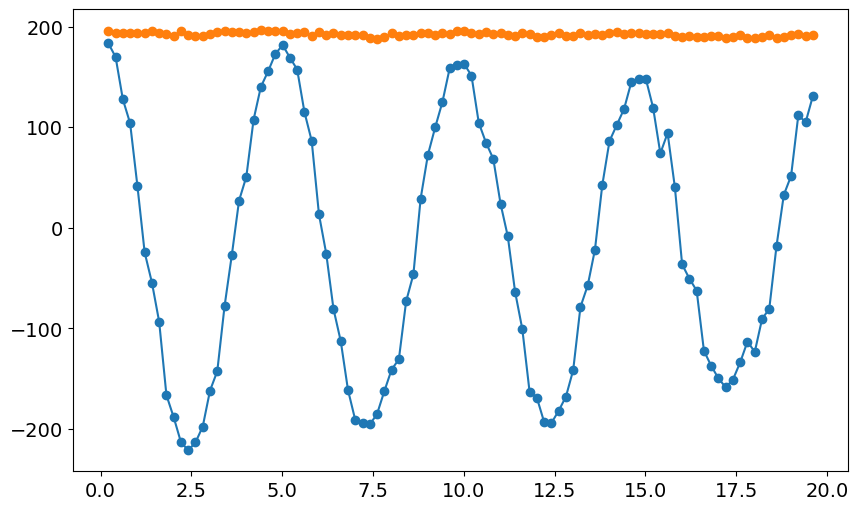

In [101]:
plt.plot(xdata_, idata, '-o', label='With ge initial pulse')
plt.plot(xdata_p, idata_p, '-o', label='Without ge initial pulse')

In [84]:
attrs['config']['expt']

{'start': 0.01,
 'step': 0.2,
 'expts': 100,
 'ramsey_freq': 0.2,
 'reps': 500,
 'rounds': 1,
 'qubits': [0],
 'checkEF': True,
 'user_defined_freq': [False, 3425.30098176373, 7575, 0.035],
 'qubit_ge_init': True,
 'qubit_ge_after': True,
 'f0g1_cavity': 0,
 'normalize': False,
 'active_reset': False,
 'man_reset': True,
 'storage_reset': False,
 'prepulse': False,
 'postpulse': False,
 'pre_active_reset_pulse': False,
 'pre_active_reset_sweep_pulse': [[3568.1751638611518,
   3425.5564066067,
   2007.0],
  [10716, 8236, 15000],
  [0, 0, 0.6056817916987671],
  [0, 0, 0],
  [2, 2, 0],
  ['g', 'g', 'flat_top'],
  [0.035, 0.035, 0.005]],
 'pre_sweep_pulse': [[3568.1751638611518,
   3425.5537944060666,
   2007.06,
   349.415],
  [10819, 8327, 15000, 3000],
  [0, 0, 0.6552866896346518, 0.973722],
  [0, 0, 0, 0],
  [2, 2, 0, 1],
  ['gaussian', 'gaussian', 'flat_top', 'flat_top'],
  [0.035, 0.035, 0.005, 0.005]],
 'reps_middlepulse': 0,
 'advance_phase': 0,
 'middlepulse': False,
 'mid_sweep_p

# Cavity Temperature

Current pi pulse frequency: 3568.1515953227604
Fit frequency from I [MHz]: 0.028826297639468663 +/- 3.2721188751145357e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	3568.152769025121
 	3568.2104216203998
T2 Ramsey from fit I [us]: 261.9937767673697
Fit frequency from Q [MHz]: 0.028625808402895442 +/- 0.00016347026976709712
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3568.1529695143577
 	3568.2102211311635
T2 Ramsey from fit Q [us]: 238.0325080202983


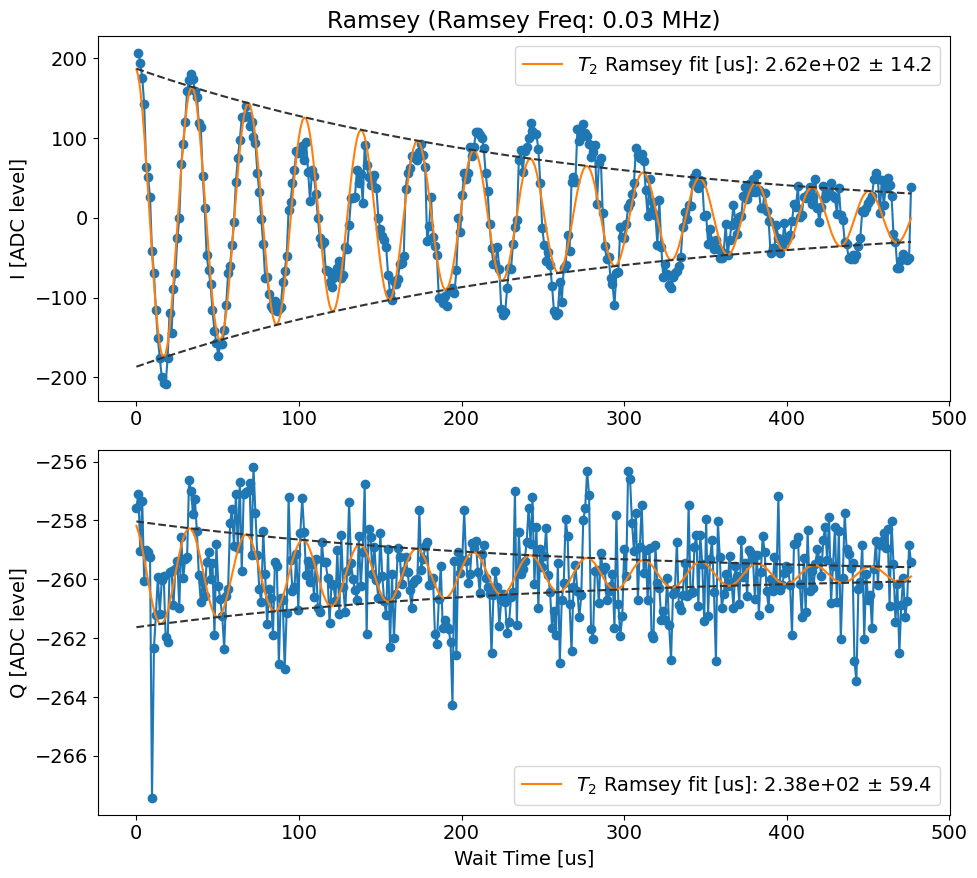

In [280]:
temp_data, attrs = prev_data(expt_path, '00036_RamseyExperiment.h5')
# temp_data, attrs = prev_data(expt_path, '00031_RamseyExperiment.h5')

t2, t2_err, xdata_, idata = Ramsey_display(temp_data,  attrs, normalize = [False, 'g_data', 'e_data'], active_reset=True, threshold = -25.73026268397916, readouts_per_rep=4,
                ramsey_freq=attrs['config']['expt']['ramsey_freq'], initial_freq=attrs['config']['device']['qubit']['f_ge_idle'][0], fit=True,fitparams=None, #[1000, 0.5, None, None, None, None],
                  return_idata = True,  title='Ramsey')

In [170]:
1/.015

66.66666666666667

In [145]:
1/0.05

20.0

In [47]:
len(ydata)

197

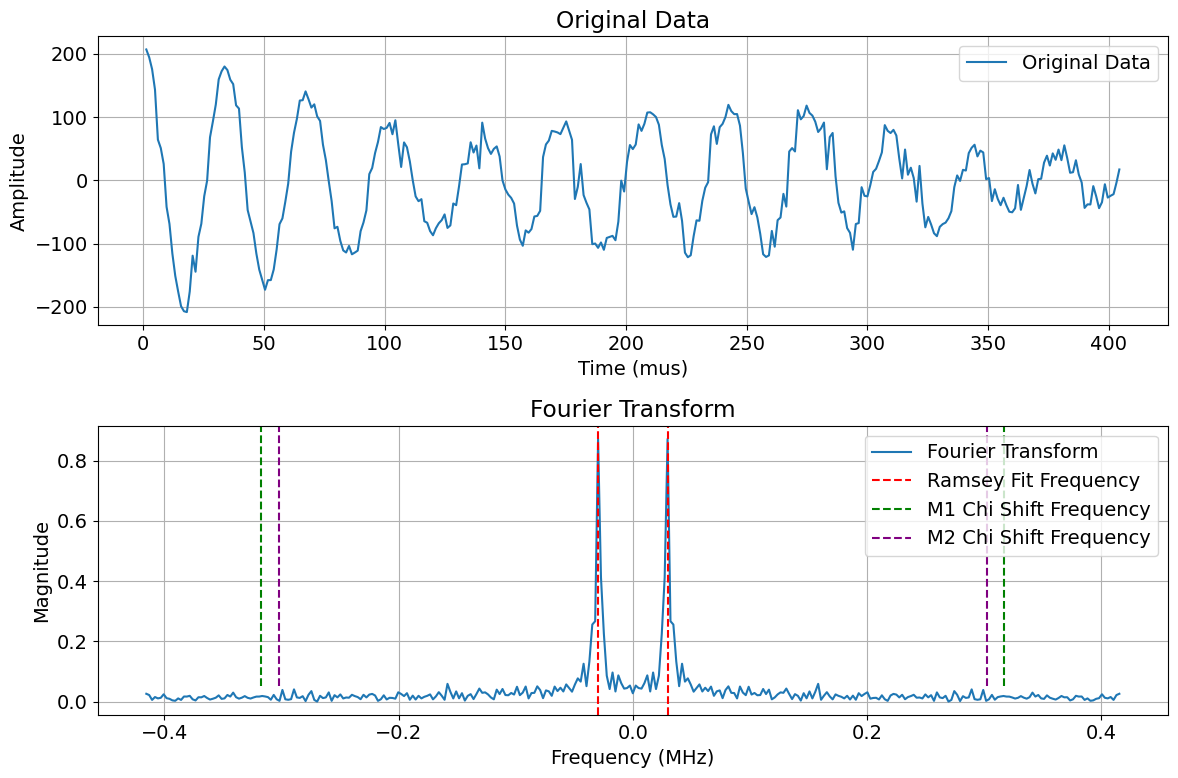

In [297]:
start_idx = 0
end_idx = -60
xdata = xdata_[start_idx:end_idx]
ydata = idata[start_idx:end_idx]


# Perform Fourier transform
ydata_fft = np.fft.fft(ydata)
frequencies = np.fft.fftfreq(len(ydata), d=(xdata[1] - xdata[0]))
# Sort the FFT data 
sorted_idx = np.argsort(frequencies)
frequencies = frequencies[sorted_idx]
ydata_fft = ydata_fft[sorted_idx]

# Plot the original data
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(xdata, ydata, label='Original Data')
plt.xlabel('Time (mus)')
plt.ylabel('Amplitude')
plt.title('Original Data')
plt.legend()
plt.grid(True)

# Plot the Fourier transform
plt.subplot(2, 1, 2)

plt.plot(frequencies, np.abs(ydata_fft) / max(ydata_fft), '-', label='Fourier Transform')

ramsey_fit_freq = attrs['config']['expt']['ramsey_freq']# 0.02 #0.21797037655105334
plt.axvline(x=ramsey_fit_freq, color='red', linestyle='--', label='Ramsey Fit Frequency')
plt.axvline(x=-ramsey_fit_freq, color='red', linestyle='--')

m1_chi = np.abs(attrs['config']['device']['QM']['chi_shift_matrix'][0][1])
m2_chi = np.abs(attrs['config']['device']['QM']['chi_shift_matrix'][0][2])  
chi_shift_ramsey_freq_m1 = ramsey_fit_freq + m1_chi
chi_shift_ramsey_freq_m2 = ramsey_fit_freq + m2_chi

plt.axvline(x=chi_shift_ramsey_freq_m1, color='green', linestyle='--', label='M1 Chi Shift Frequency', ymin = 0.1)
plt.axvline(x=-1 * chi_shift_ramsey_freq_m1, color='green', linestyle='--', ymin=0.1)
plt.axvline(x=chi_shift_ramsey_freq_m2, color='purple', linestyle='--', label='M2 Chi Shift Frequency', ymin = 0.1)
plt.axvline(x=-1 * chi_shift_ramsey_freq_m2, color='purple', linestyle='--', ymin=0.1)


plt.xlabel('Frequency (MHz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


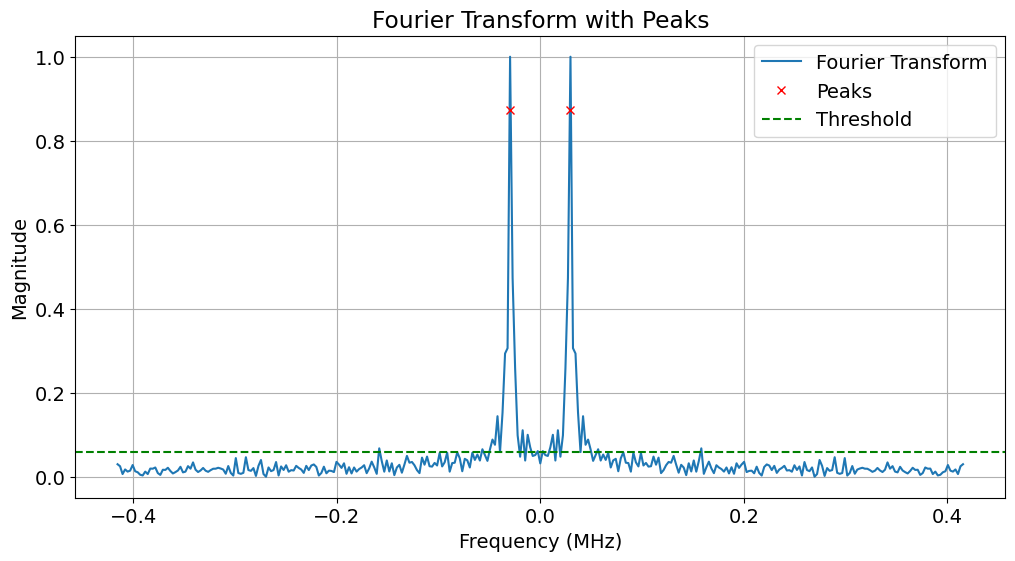

In [299]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Assuming xdata and ydata are already defined
xdata = frequencies
ydata = np.abs(ydata_fft) / max(ydata_fft)

# Find peaks
peaks, _ = find_peaks(ydata, threshold=0.1)

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(xdata, np.abs(ydata), label='Fourier Transform')
plt.plot(xdata[peaks], ydata[peaks], 'rx', label='Peaks')  # Mark peaks with red 'x'

# add horizzontal line at 0.04
plt.axhline(y=0.06, color='g', linestyle='--', label='Threshold')

plt.xlabel('Frequency (MHz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform with Peaks')
plt.legend()
plt.grid(True)
plt.show()

In [304]:
ramsey_peak_height = max(np.abs(ydata[peaks]))
ramsey_freq = frequencies[peaks][0]
print('Ramsey Peak Height:', ramsey_peak_height)
print('Ramsey Frequency:', ramsey_freq)

m1_chi = np.abs(attrs['config']['device']['QM']['chi_shift_matrix'][0][1])
m2_chi = np.abs(attrs['config']['device']['QM']['chi_shift_matrix'][0][2])

chi_shift_ramsey_freq_m1 = ramsey_freq + m1_chi
chi_shift_ramsey_freq_m2 = ramsey_freq + m2_chi

# find max height in range of 30 khz above and below the chi shift frequency
chi_shift_range = 2
chi_shift_range = chi_shift_range * 1e-3


def find_max_height(frequencies, ydata,  freq, chi_shift_range): 
    '''
    Find the max height in the range of chi_shift_range above and below the frequency
    '''
    idx = np.where((frequencies > freq - chi_shift_range) & (frequencies < freq + chi_shift_range))
    idx2 = np.where((frequencies > -1*(freq -chi_shift_range)) & (frequencies < -1*(freq + chi_shift_range)))
    return max(np.concatenate((np.abs(ydata[idx]), np.abs(ydata[idx2]))))

m1_chi_shift_height = find_max_height(frequencies, ydata, chi_shift_ramsey_freq_m1, chi_shift_range)
m2_chi_shift_height = find_max_height(frequencies, ydata, chi_shift_ramsey_freq_m2, chi_shift_range)

print('M1 Chi Shift Height:', m1_chi_shift_height)
print('M2 Chi Shift Height:', m2_chi_shift_height)

# frequencies

Ramsey Peak Height: 1.0
Ramsey Frequency: -0.029673590504451047
M1 Chi Shift Height: 0.002941189445683609
M2 Chi Shift Height: 0.014842431400151465


In [305]:
# TAKE ratio of chi shift height to ramsey peak height
m1_chi_shift_ratio = m1_chi_shift_height / ramsey_peak_height
m2_chi_shift_ratio = m2_chi_shift_height / ramsey_peak_height

# convert into temperature 
freq_to_mK = 48 # 1Ghz = 48mK

m1_freq = attrs['config']['device']['manipulate']['f_ge'][0] * 1e-3
m2_freq = attrs['config']['device']['manipulate']['f_ge'][1] * 1e-3

m1_temp = m1_freq * freq_to_mK
m2_temp = m2_freq * freq_to_mK

m1_temp_th = m1_temp / np.log((m1_chi_shift_ratio + 1)/m1_chi_shift_ratio)
m2_temp_th = m2_temp / np.log((m2_chi_shift_ratio + 1)/m2_chi_shift_ratio)

print('M1 Temp (mk):', m1_temp_th)
print('M2 Temp (mK):', m2_temp_th)

# print thermal populations 
m1_n_th = m1_chi_shift_ratio
m2_n_th = m2_chi_shift_ratio
print('M1 n_th (%):', m1_n_th * 100)
print('M2 n_th (%):', m2_n_th * 100)


M1 Temp (mk): 41.0216493051835
M2 Temp (mK): 58.59811071644539
M1 n_th (%): 0.2941189445683609
M2 n_th (%): 1.4842431400151466


In [153]:
m1_chi

0.28725

In [63]:
frequencies

array([ 0.        ,  0.00252016,  0.00504032,  0.00756048,  0.01008065,
        0.01260081,  0.01512097,  0.01764113,  0.02016129,  0.02268145,
        0.02520161,  0.02772177,  0.03024194,  0.0327621 ,  0.03528226,
        0.03780242,  0.04032258,  0.04284274,  0.0453629 ,  0.04788306,
        0.05040323,  0.05292339,  0.05544355,  0.05796371,  0.06048387,
        0.06300403,  0.06552419,  0.06804435,  0.07056452,  0.07308468,
        0.07560484,  0.078125  ,  0.08064516,  0.08316532,  0.08568548,
        0.08820565,  0.09072581,  0.09324597,  0.09576613,  0.09828629,
        0.10080645,  0.10332661,  0.10584677,  0.10836694,  0.1108871 ,
        0.11340726,  0.11592742,  0.11844758,  0.12096774,  0.1234879 ,
        0.12600806,  0.12852823,  0.13104839,  0.13356855,  0.13608871,
        0.13860887,  0.14112903,  0.14364919,  0.14616935,  0.14868952,
        0.15120968,  0.15372984,  0.15625   ,  0.15877016,  0.16129032,
        0.16381048,  0.16633065,  0.16885081,  0.17137097,  0.17

In [64]:
m1_chi - m2_chi

0.015110000000000012

In [75]:
m1_chi

0.28725

In [76]:
m2_chi

0.27214

# Fitting 2 frequencies

In [183]:
def connie_multifreq_ramsey( data=None, fit=True, fit_num_sin=1, attrs = None,  
                   active_reset = False, threshold = -20, readouts_per_rep = 4,  title='Ramsey', ramsey_freq=None):
    
    # fitparams=[amp, freq (non-angular), phase (deg), decay time, amp offset]
    # fitparams=[yscale0, freq0, phase_deg0, decay0, yscale1, freq1, phase_deg1, y0] # two fit freqs
    # fitparams=[yscale0, freq0, phase_deg0, decay0, y00, x00, yscale1, freq1, phase_deg1, y01, yscale2, freq2, phase_deg2, y02] # three fit freqs

    # Remove the first and last point from fit in case weird edge measurements

    if active_reset:
        Ilist, Qlist = post_select_raverager_data(data, attrs, threshold, readouts_per_rep)
        data['avgi'] = Ilist
        data['avgq'] = Qlist
        data['xpts'] = data['xpts'][:-1]
        data['amps'] = data['amps'][:-1] # adjust since active reset throws away the last data point

    fitparams = None
    if fit_num_sin == 2:
        fitfunc = fitter.fittwofreq_decaysin
        fitparams = [None] * 8
        fitparams[1] = ramsey_freq
        fitparams[3] = 15  # decay
        fitparams[4] = 0.05  # yscale1 (ratio relative to base oscillations)
        fitparams[5] = 1 / 12.5  # freq1
        # print('FITPARAMS', fitparams[7])
    elif fit_num_sin == 3:
        fitfunc = fitter.fitthreefreq_decaysin
        fitparams = [None] * 14
        fitparams[1] = ramsey_freq
        fitparams[3] = 15  # decay
        fitparams[6] = 1.1  # yscale1
        fitparams[7] = 0.415  # freq1
        fitparams[-4] = 1.1  # yscale2
        fitparams[-3] = 0.494  # freq2
        # print('FITPARAMS', fitparams[7])
    else:
        fitfunc = fitter.fitdecaysin
        fitparams = [None, ramsey_freq, 0, None, None]
    p_avgi, pCov_avgi = fitfunc(data["xpts"][:-1], data["avgi"][:-1], fitparams=fitparams)
    p_avgq, pCov_avgq = fitfunc(data["xpts"][:-1], data["avgq"][:-1], fitparams=fitparams)
    p_amps, pCov_amps = fitfunc(data["xpts"][:-1], data["amps"][:-1], fitparams=fitparams)
    data["fit_avgi"] = p_avgi
    data["fit_avgq"] = p_avgq
    data["fit_amps"] = p_amps
    data["fit_err_avgi"] = pCov_avgi
    data["fit_err_avgq"] = pCov_avgq
    data["fit_err_amps"] = pCov_amps

    # print('p avgi', p_avgi)
    # print('p avgq', p_avgq)
    # print('p amps', p_amps)

    return data

Attempted to init fitparam 1 to 0.07293762575452717, which is out of bounds 0.00025201612903225806 to 0.03780241935483871. Instead init to 0.019027217741935484
Attempted to init fitparam 1 to 0.07293762575452717, which is out of bounds 0.00025201612903225806 to 0.03780241935483871. Instead init to 0.019027217741935484
Current pi pulse frequency: 3500
Fit frequency from I [MHz]: 0.022128784673029114 +/- 0.0040380983433288605
Suggested new pi pulse frequency from fit I [MHz]:
 	3499.997871215327
 	3500.042128784673
T2 Ramsey from fit I [us]: 119.04
Fit frequency from Q [MHz]: 0.015503981385367786 +/- 0.0010016486059185414
Suggested new pi pulse frequencies from fit Q [MHz]:
 	3500.0044960186146
 	3500.0355039813853
T2 Ramsey from fit Q [us]: 119.04000000042609


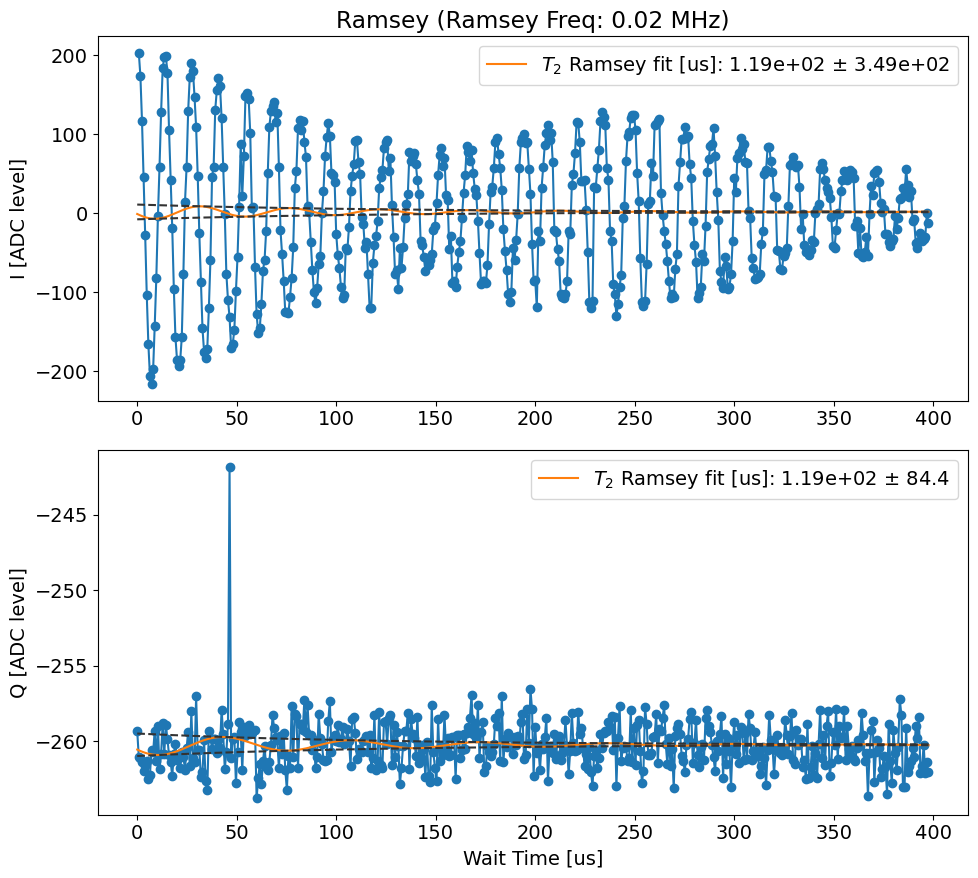

In [241]:
temp_data, attrs = prev_data(expt_path, '00015_RamseyExperiment.h5')
p, pCov, xdata_, idata = Ramsey_display(temp_data,  attrs, normalize = [False, 'g_data', 'e_data'], active_reset=True, threshold = -25.73026268397916, readouts_per_rep=4,)
                                        

freq0 (MHz) 0.028589264892365646
freq1 (MHz) 0.018910317691146462


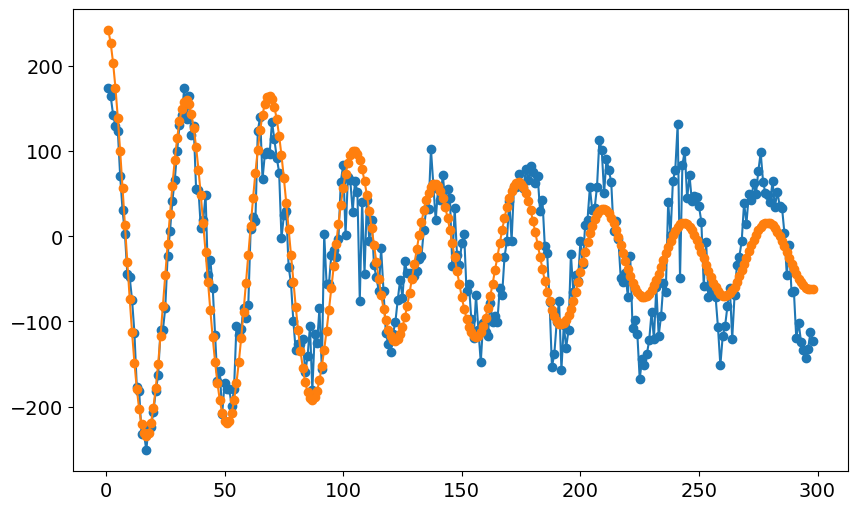

In [218]:
ramsey_freq = attrs['config']['expt']['ramsey_freq']

fitfunc = fitter.fittwofreq_decaysin
func = fitter.twofreq_decaysin
fitparams = [None] * 8
fitparams[1] = ramsey_freq
fitparams[5] = 0.02  # decay
# fitparams[1] = ramsey_freq
# fitparams[3] = 15  # decay
# fitparams[4] = 0.05  # yscale1 (ratio relative to base oscillations)
# fitparams[5] = 1 / 12.5  # freq1
# print('FITPARAMS', fitparams[7])
   
p_avgi, pCov_avgi = fitfunc(xdata_[:-1], idata[:-1], fitparams=fitparams)
    
plt.plot(xdata_, idata, '-o', label='original')
# plot fit 

plt.plot(xdata_, func(xdata_, *p_avgi), '-o', label='fit')

yscale0, freq0, phase_deg0, decay0, yscale1, freq1, phase_deg1, y0 = p_avgi
#print the 2 frequencies 
print('freq0 (MHz)', freq0)
print('freq1 (MHz)', freq1)

freq0 (MHz) 0.0724541930055813
freq1 (MHz) 0.011522811770509797


In [196]:
p_avgi

array([3.14726256e+02, 7.24703783e-02, 9.28782306e+01, 1.56961672e+02,
       1.33993021e-01, 4.99494245e-01, 9.55517022e+01, 1.98840277e+00])

In [190]:
len(idata)

497

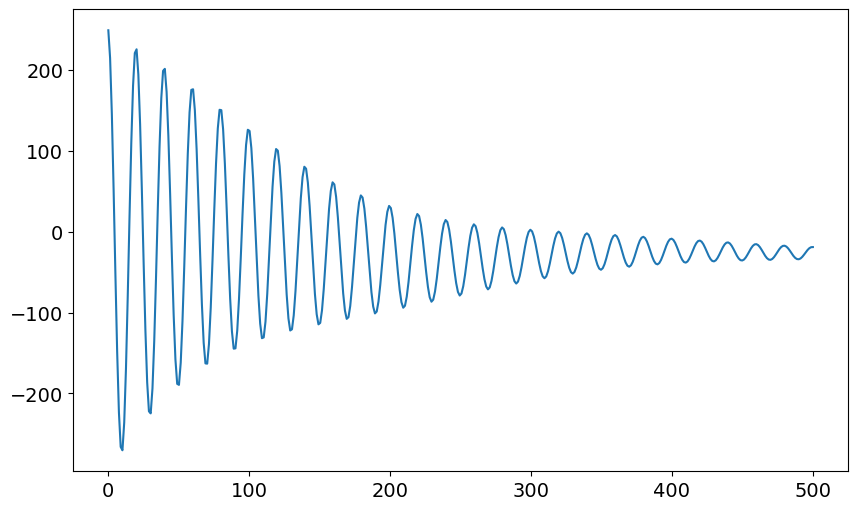

In [225]:
xpts = np.linspace(0, 500, 400)
freq1 = 0.003
freq0 = 0.05

ypts = y0 + np.exp(-xpts / decay0) * yscale0 * (
        (1 - yscale1) * np.sin(2 * np.pi * freq0 * xpts + phase_deg0 * np.pi / 180)
        + yscale1 * np.sin(2 * np.pi * freq1 * xpts + phase_deg1 * np.pi / 180) )

plt.plot(xpts, ypts)

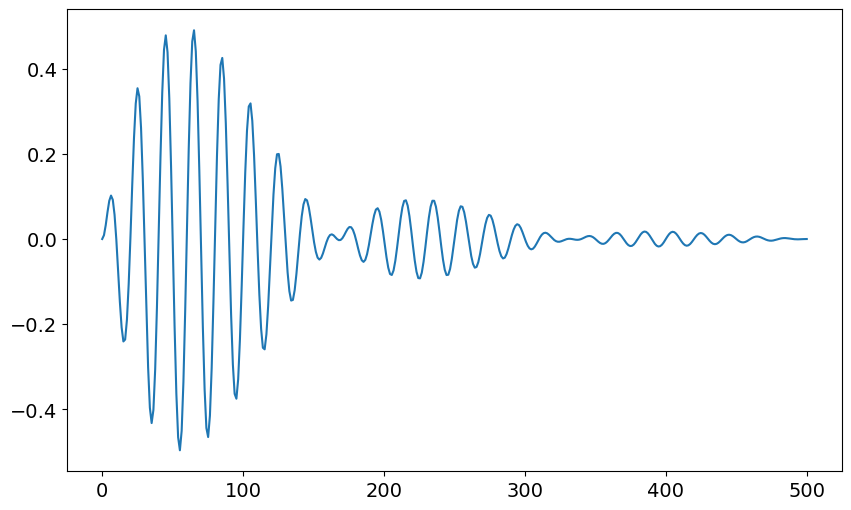

In [236]:
freq0 = 0.05
freq1 = 0.003
kappa = 0.01
ypts = np.exp(-1 * kappa * xpts) * np.sin(2 * np.pi * freq0 * xpts) * np.sin(2 * np.pi * freq1 * xpts)
plt.plot(xpts, ypts)